In [1]:
library(GLMsData)
library(MASS)
data(humanfat)

In [2]:
str(humanfat)

'data.frame':	18 obs. of  4 variables:
 $ Age        : int  23 23 27 27 39 41 45 49 50 53 ...
 $ Percent.Fat: num  9.5 27.9 7.8 17.8 31.4 25.9 27.4 25.2 31.1 34.7 ...
 $ Gender     : Factor w/ 2 levels "F","M": 2 1 2 2 1 1 2 1 1 1 ...
 $ BMI        : num  17.8 22.5 24.6 20.5 25.1 21.4 26 22.3 21.8 28.4 ...


In [22]:
humanfat

Age,Percent.Fat,Gender,BMI
23,9.5,M,17.8
23,27.9,F,22.5
27,7.8,M,24.6
27,17.8,M,20.5
39,31.4,F,25.1
41,25.9,F,21.4
45,27.4,M,26.0
49,25.2,F,22.3
50,31.1,F,21.8
53,34.7,F,28.4


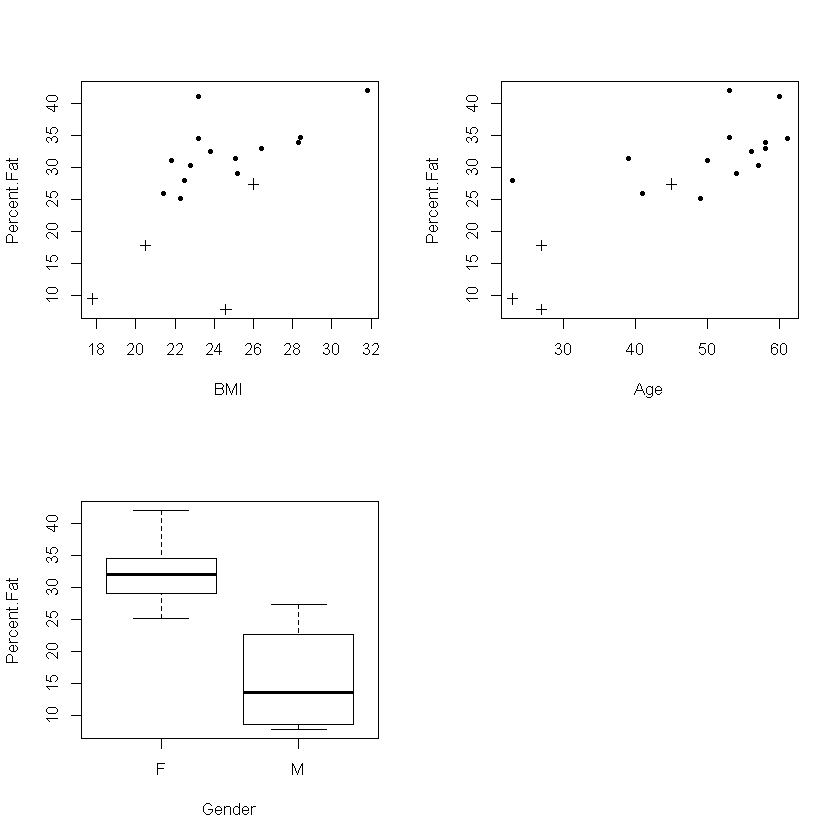

In [8]:
par(mfrow=c(2, 2))
plot(Percent.Fat ~ BMI, data=humanfat, pch=ifelse(Gender=="M", 3, 20))
plot(Percent.Fat ~ Age, data=humanfat, pch=ifelse(Gender=="M", 3, 20))
boxplot(Percent.Fat ~ Gender, data=humanfat)

In [9]:
lm.1 <- lm(Percent.Fat ~ Age * factor(Gender), data=humanfat)

In [10]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),20.1116365,6.2394506,3.223302,0.006129755
Age,0.2400802,0.1203972,1.994068,0.065997517
factor(Gender)M,-29.2691967,10.4097941,-2.811698,0.013857482
Age:factor(Gender)M,0.5724628,0.2893456,1.978474,0.067896321


In [11]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,891.87365,891.87365,44.273608,1.089288e-05
factor(Gender),1,168.78671,168.78671,8.378761,1.176673e-02
Age:factor(Gender),1,78.85316,78.85316,3.914359,6.789632e-02
Residuals,14,282.02425,20.14459,NA,NA


In [15]:
summary(lm.1)$fstatistic

value    numdf    dendf 
18.85558  3.00000 14.00000

In [17]:
1- pf(18.855, 3, 14)

[1] 3.455791e-05

In [33]:
male_fit <- predict(lm.1, newdata=subset(humanfat, subset=Gender=="M"), se.fit=TRUE)

In [34]:
female_fit <- predict(lm.1, newdata=subset(humanfat, subset=Gender=="F"), se.fit=TRUE)

In [35]:
male_fit

$fit
        1         3         4         7 
 9.530928 12.781100 12.781100 27.406873 

$se.fit
       1        3        4        7 
2.988323 2.425728 2.425728 4.426148 

$df
[1] 14

$residual.scale
[1] 4.488272

In [36]:
female_fit

$fit
       2        5        6        8        9       10       11       12 
25.63348 29.47476 29.95492 31.87557 32.11565 32.83589 32.83589 33.07597 
      13       14       15       16       17       18 
33.55613 33.79621 34.03629 34.03629 34.51645 34.75653 

$se.fit
       2        5        6        8        9       10       11       12 
3.561979 1.864630 1.687403 1.220202 1.203972 1.226972 1.226972 1.257807 
      13       14       15       16       17       18 
1.349922 1.409213 1.475962 1.475962 1.628068 1.711771 

$df
[1] 14

$residual.scale
[1] 4.488272

In [37]:
t_star <- qt(0.95, lm.1$df)

In [38]:
conf_male_fit_lo <- male_fit$fit - t_star * male_fit$se.fit
conf_male_fit_hi <- male_fit$fit + t_star * male_fit$se.fit

In [58]:
conf_female_fit_lo <- female_fit$fit - t_star * female_fit$se.fit
conf_female_fit_hi <- female_fit$fit + t_star * female_fit$se.fit

In [59]:
c("Female lower"=conf_female_fit_lo, "Female higher"=conf_female_fit_hi)

Female lower.2   Female lower.5   Female lower.6   Female lower.8 
        19.35973         26.19057         26.98288         29.72641 
  Female lower.9  Female lower.10  Female lower.11  Female lower.12 
        29.99508         30.67481         30.67481         30.86058 
 Female lower.13  Female lower.14  Female lower.15  Female lower.16 
        31.17849         31.31415         31.43666         31.43666 
 Female lower.17  Female lower.18  Female higher.2  Female higher.5 
        31.64892         31.74157         31.90723         32.75896 
 Female higher.6  Female higher.8  Female higher.9 Female higher.10 
        32.92696         34.02472         34.23621         34.99696 
Female higher.11 Female higher.12 Female higher.13 Female higher.14 
        34.99696         35.29136         35.93376         36.27827 
Female higher.15 Female higher.16 Female higher.17 Female higher.18 
        36.63591         36.63591         37.38398         37.77149

In [53]:
humanfat[humanfat$Gender=="M",]

,Age,Percent.Fat,Gender,BMI
1,23,9.5,M,17.8
3,27,7.8,M,24.6
4,27,17.8,M,20.5
7,45,27.4,M,26.0


In [60]:
hatvalues(lm.1)

1          2          3          4          5          6          7 
0.44329897 0.62983141 0.29209622 0.29209622 0.17259457 0.14134457 0.97250859 
         8          9         10         11         12         13         14 
0.07391036 0.07195724 0.07473273 0.07473273 0.07853618 0.09046053 0.09858141 
        15         16         17         18 
0.10814145 0.10814145 0.13157895 0.14545641

In [61]:
cooks.distance(lm.1)

1            2            3            4            5            6 
1.697983e-05 2.930391e-01 1.794773e-01 1.822117e-01 1.159685e-02 3.911905e-02 
           7            8            9           10           11           12 
7.543190e-04 4.766032e-02 1.069558e-03 3.764462e-03 9.097855e-02 1.814597e-02 
          13           14           15           16           17           18 
1.513664e-03 1.840424e-02 1.811932e-03 9.420230e-05 9.384863e-02 1.626725e-04

In [62]:
qf(0.5, 3, 14)

[1] 0.828418

In [63]:
rstudent(lm.1)

1            2            3            4            5            6 
-0.008899555  0.820248153 -1.358260637  1.370050119  0.458068279 -0.973128275 
           7            8            9           10           11           12 
-0.008899555 -1.635361984 -0.226800570  0.418869142  2.483797716 -0.917613900 
          13           14           15           16           17           18 
-0.238275814 -0.810331104 -0.236096531 -0.053724020  1.671922737 -0.059587430

In [64]:
rstandard(lm.1)

1            2            3            4            5            6 
-0.009235476  0.830004480 -1.319042852  1.329052836  0.471569467 -0.974976261 
           7            8            9           10           11           12 
-0.009235476 -1.545547407 -0.234897811  0.431777129  2.122646472 -0.922835599 
          13           14           15           16           17           18 
-0.246732303 -0.820454785 -0.244485356 -0.055745863  1.574040599 -0.061828355

Câu 3.10, 3.11, 3.12 chưa làm được :(

In [65]:
influence.measures(lm.1)

Influence measures of
	 lm(formula = Percent.Fat ~ Age * factor(Gender), data = humanfat) :

      dfb.1_   dfb.Age dfb.f.G. dfb.A..G    dffit  cov.r   cook.d    hat inf
1   1.06e-18 -2.04e-18 -0.00533  0.00477 -0.00794  2.416 1.70e-05 0.4433   *
2   1.06e+00 -1.01e+00 -0.63410  0.41920  1.06994  2.969 2.93e-01 0.6298   *
3   0.00e+00  0.00e+00 -0.42934  0.30119 -0.87249  1.117 1.79e-01 0.2921    
4   6.03e-16 -5.58e-16  0.43307 -0.30380  0.88006  1.108 1.82e-01 0.2921    
5   1.83e-01 -1.60e-01 -0.10972  0.06665  0.20921  1.525 1.16e-02 0.1726    
6  -3.26e-01  2.78e-01  0.19568 -0.11554 -0.39482  1.182 3.91e-02 0.1413    
7   3.72e-17 -3.26e-17  0.02939 -0.04149 -0.05293 48.925 7.54e-04 0.9725   *
8  -1.70e-01  8.47e-02  0.10213 -0.03523 -0.46200  0.687 4.77e-02 0.0739    
9  -1.74e-02  5.41e-03  0.01043 -0.00225 -0.06315  1.427 1.07e-03 0.0720    
10 -2.19e-03  2.50e-02  0.00131 -0.01042  0.11904  1.378 3.76e-03 0.0747    
11 -1.30e-02  1.48e-01  0.00778 -0.06176  0.70589  0.307 9.1

In [66]:
rowSums(influence.measures(lm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 
 1  3  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0

In [67]:
colSums(influence.measures(lm.1)$is.inf)

dfb.1_  dfb.Age dfb.f(G) dfb.A:(G    dffit    cov.r   cook.d      hat 
       1        1        0        0        0        3        0        1